In [1]:
%pip install nltk==3.9.1 | tail -n 1
%pip install wordcloud==1.9.4 | tail -n 1
%pip install pandas==2.1.4 | tail -n 1
%pip install numpy==1.24.3 | tail -n 1
%pip install seaborn==0.13.2 | tail -n 1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
plotnine 0.14.3 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
plotnine 0.14.3 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords

def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/-H0BcPr512mhbTDDfkcTJA/comments-with-emotions.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   comment         1156 non-null   object 
 1   like_count      1156 non-null   int64  
 2   published_at    1156 non-null   object 
 3   author          1156 non-null   object 
 4   sentiment       1156 non-null   object 
 5   emotions        1156 non-null   object 
 6   anger           1156 non-null   float64
 7   fear            1156 non-null   float64
 8   negative        1156 non-null   float64
 9   positive        1156 non-null   float64
 10  trust           1156 non-null   float64
 11  anticipation    1156 non-null   float64
 12  joy             1156 non-null   float64
 13  surprise        1156 non-null   float64
 14  sadness         1156 non-null   float64
 15  disgust         1156 non-null   float64
 16  positive_count  1156 non-null   int64  
dtypes: float64(10), int64(2), object(

In [6]:
# Step 1: Remove duplicates
df = df.drop_duplicates()

# Step 2: Remove rows with missing values
df = df.dropna()

# Step 3: Drop unnecessary columns
df = df.drop(columns=['published_at', 'author'])

df

,comment,like_count,sentiment,emotions,anger,fear,negative,positive,trust,anticipation,joy,surprise,sadness,disgust,positive_count
0,If this fight were real and not just an exhibi...,0,Positive,"{'anger': 3, 'fear': 3, 'negative': 2, 'positi...",3.0,3.0,2.0,8.0,7.0,6.0,5.0,2.0,2.0,1.0,1
1,Tyson will bust his hide. People forget with h...,0,Neutral,"{'fear': 2, 'negative': 3, 'anticipation': 1, ...",1.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,We signing the contract with this one 🗣🗣🗣🗣🔥🔥🔥🔥,0,Neutral,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Watching cm punk fight in the ufc is better th...,0,Positive,"{'anger': 2, 'fear': 1, 'negative': 1}",2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Yall forget how much Ring IQ this guy has. AND...,0,Positive,"{'negative': 1, 'positive': 1, 'anticipation': 1}",0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,WTF,0,Negative,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1152,Is this real or a joke?,42,Positive,"{'positive': 1, 'trust': 1, 'negative': 1}",0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1153,Bruh,0,Neutral,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1154,First comment 😂,0,Positive,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


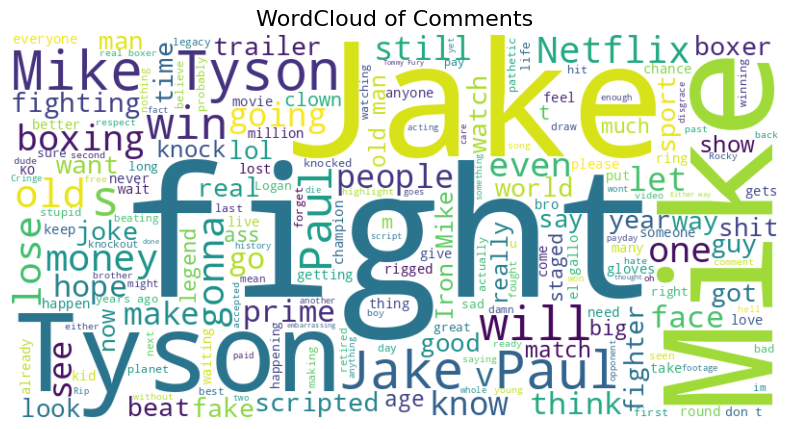

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud for 'comment' column
text = " ".join(comment for comment in df['comment'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Comments", fontsize=16)
plt.show()

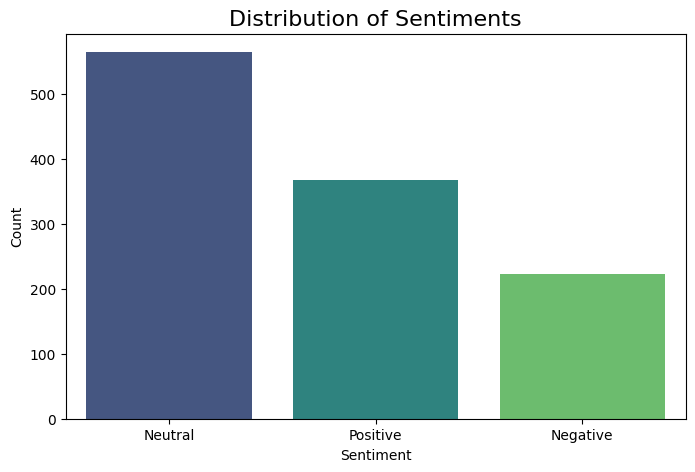

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='viridis')
plt.title("Distribution of Sentiments", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

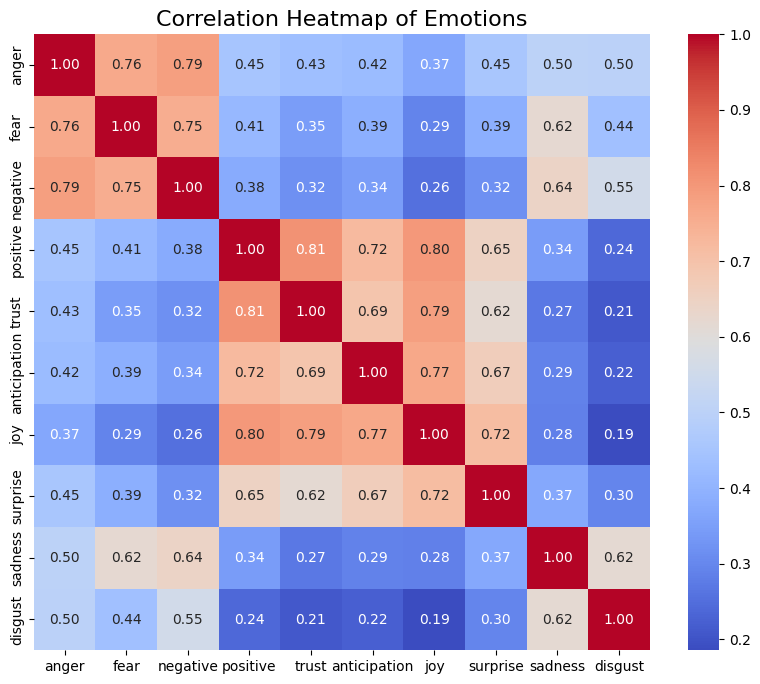

In [9]:
import seaborn as sns

emotion_columns = ['anger', 'fear', 'negative', 'positive', 'trust',
                   'anticipation', 'joy', 'surprise', 'sadness', 'disgust']
correlation_matrix = df[emotion_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap of Emotions", fontsize=16)
plt.show()

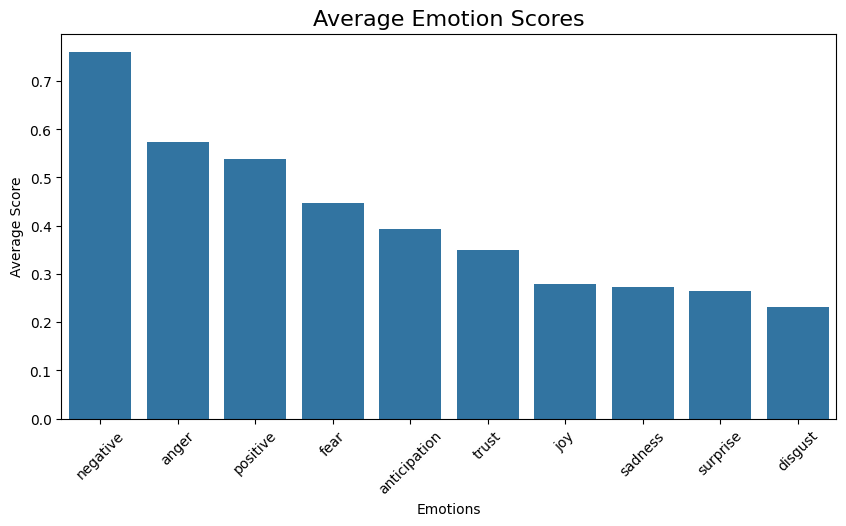

In [10]:
# Barplot of top emotions
mean_emotions = df[emotion_columns].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=mean_emotions.index, y=mean_emotions.values)
plt.title("Average Emotion Scores", fontsize=16)
plt.xlabel("Emotions")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


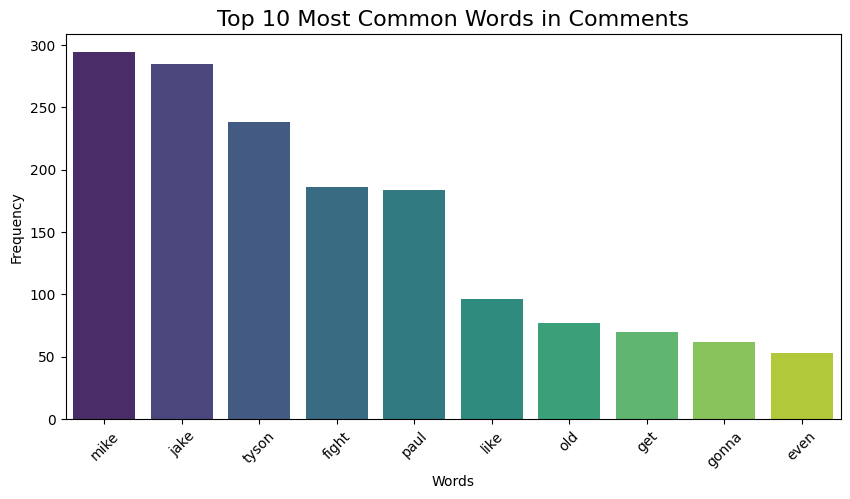

In [11]:
# Top 10 most common words in comments
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_words = " ".join(df['comment'].astype(str)).split()
filtered_words = [word.lower() for word in all_words if word.isalpha() and word.lower() not in stop_words]
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title("Top 10 Most Common Words in Comments", fontsize=16)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

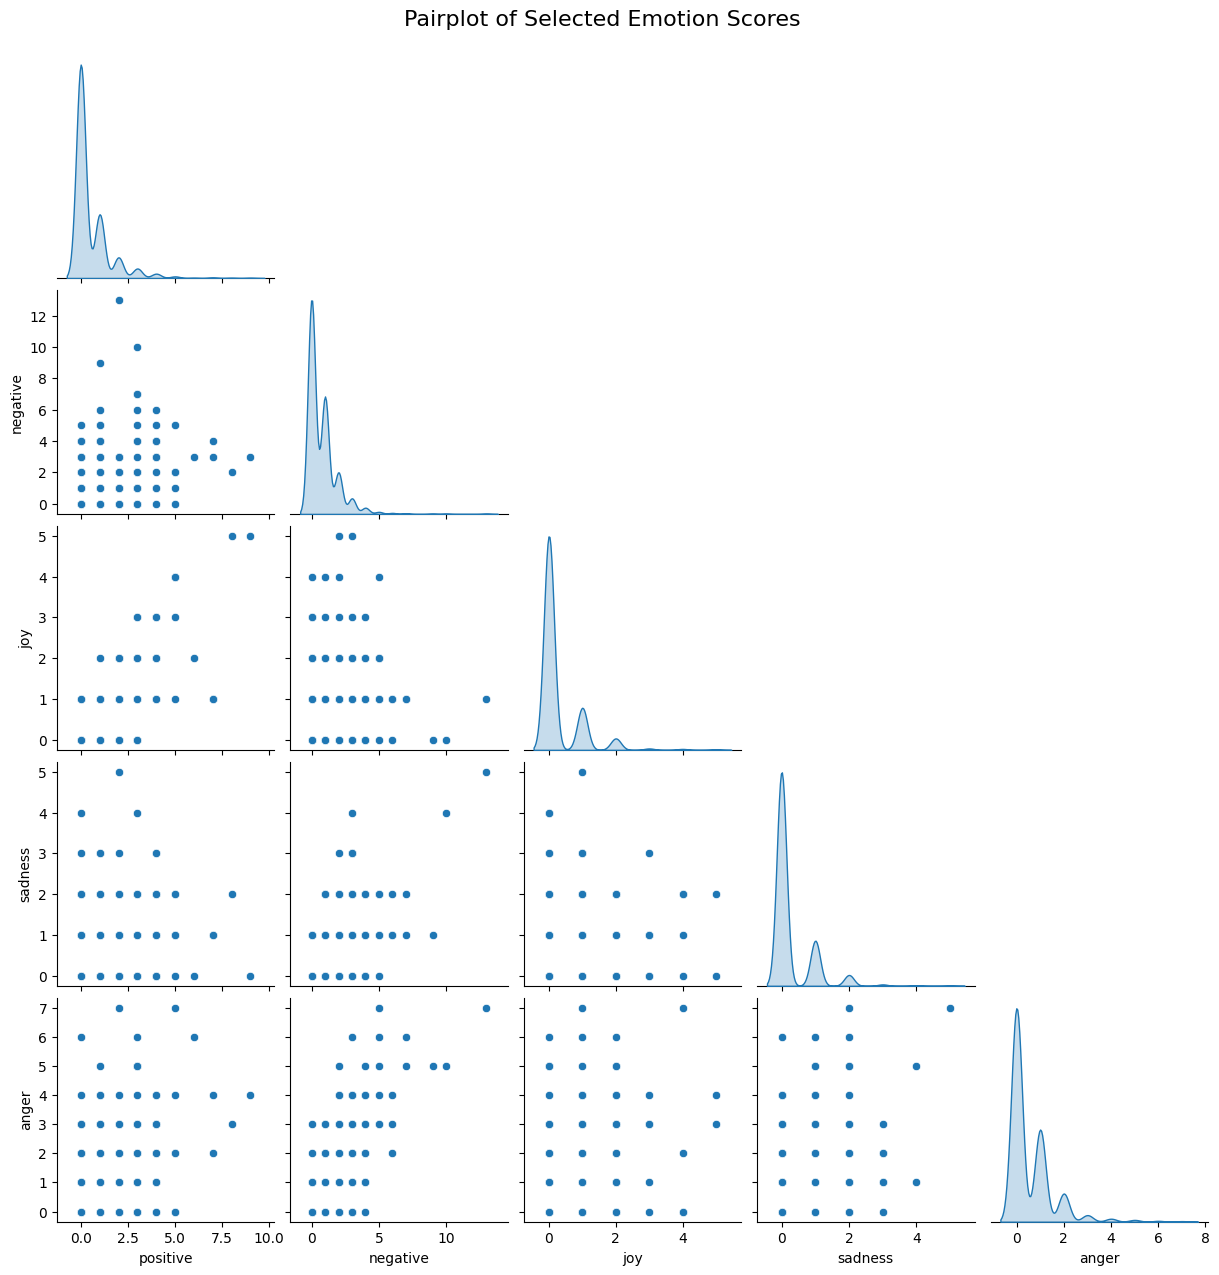

In [12]:
# Pairplot for selected emotion columns
selected_emotions = ['positive', 'negative', 'joy', 'sadness', 'anger']
sns.pairplot(df[selected_emotions], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Selected Emotion Scores", y=1.02, fontsize=16)
plt.show()

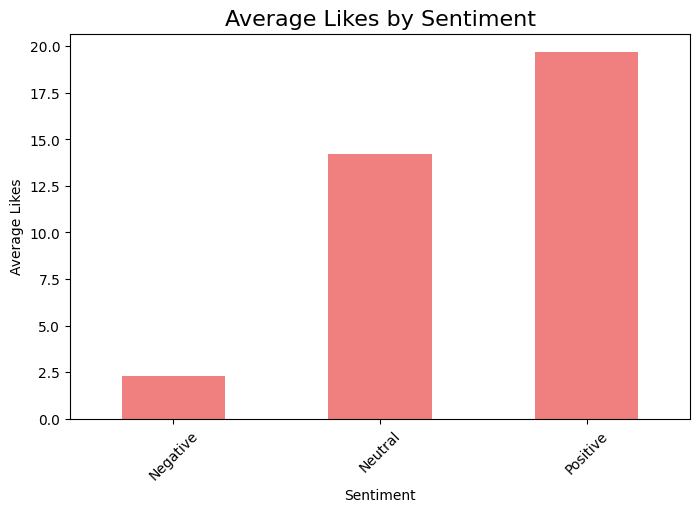

In [13]:
# Average likes by sentiment
avg_likes = df.groupby('sentiment')['like_count'].mean()
plt.figure(figsize=(8, 5))
avg_likes.plot(kind='bar', color='lightcoral')
plt.title("Average Likes by Sentiment", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Average Likes")
plt.xticks(rotation=45)
plt.show()

In [14]:
pd.set_option('display.max_colwidth', None)

# Comments with highest positive emotion scores
top_positive_comments = df.sort_values(by='positive', ascending=False).head(5)

# Correct syntax to print specific columns
print(top_positive_comments[['comment', 'positive']])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        comment  \
57                                                        I think you past your prime and are foolish enough to think the internet cares about your extremist mindset on a boxing match forgetting that the entertainment world is all about entertainment and engagement. You do the engaging and we will watch it for the entertainment . Tysons a full grown man who makes his own

In [15]:
top_positive_comments = df.sort_values(by='negative', ascending=False).head(5)

# Correct syntax to print specific columns
print(top_positive_comments[['comment', 'negative']])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  comment  \
280  Mr Tyson  no disrespect bro , please , PLEASE withdraw from this fight with the young hungry heavyweight prospect & future Undisputed World Champion ,"The 1:24  Problem Child" Jake Paul (10-1- 0  7 KO) ,  1st dan black belt Uechi Ryu Karate Do  🥋🇯🇵  .\n\nOnce again Mr Tyson , please PLEASE withdraw from this dangerous fight as you will be hurt & we fear for your health & safety .\n\n\nFriend of Grandmaster Steven Segal Sensei : 11th dan black belt 🥋 